# Feature Engineering

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None, 'display.max_rows', 100)

In [2]:
# Import
df = pd.read_csv('houseprice.csv')
print('DataTypes')
df.dtypes.value_counts()

DataTypes


object     43
int64      35
float64     3
dtype: int64

In [311]:
# Trimming columns with more than 90% missing values
for var in df.columns:
    if df[var].isnull().mean() > 0.9:
        df = df.drop(columns=var, axis=1)

In [312]:
# Creating lists for each dataype
categorical = [var for var in df.columns if df[var].dtype == 'O']
discrete = [var for var in df.columns if df[var].dtype != 'O' and df[var].nunique() < 20]
continuous = [var for var in df.columns if df[var].dtype != 'O' and var not in discrete and var != 'SalePrice']

print('Categorical variables are {}'.format(len(categorical)))
print(categorical)
print('')
print('Discrete variables are {}'.format(len(discrete)))
print(discrete)
print('')
print('Continuous variables are {}'.format(len(continuous)))
print(continuous)
print('')

Categorical variables are 40
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

Discrete variables are 15
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']

Continuous variables are 22
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Low

In [336]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1] , test_size=0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1168, 77), (292, 77), (1168,), (292,))

## Missing Values

In [337]:
#Missing Values
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

#For the Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [338]:
# X_train.isnull().any().reset_index().iloc[:,1]

In [339]:
# missing_values = [var for var in df.columns if df[var].isnull().sum() > 0]
# print('Variables containing missing values are {} :'.format(len(missing_values)))
# print(missing_values)

In [340]:
missing_cont = [var+'_ind' for var in X_train[continuous] if X_train[var].isnull().sum() > 0]
missing_disc = [var+'_ind' for var in X_train[discrete] if X_train[var].isnull().sum() > 0]
missing_cate = [var+'_ind' for var in X_train[categorical] if X_train[var].isnull().sum() > 0]

In [341]:
# Building a pipline to handle missing values


continuous_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
])

discrete_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
])

categorical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing', add_indicator=True)),
])


preprocessor = ColumnTransformer(transformers=[
    ('continuous_imputer', continuous_imputer, continuous),
    ('discrete_imputer', discrete_imputer, discrete),
    ('categorical_imputer', categorical_imputer, categorical)
    
])

In [342]:
X_test[categorical].isnull().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
Fence             True
SaleType         False
SaleCondition    False
dtype: bool

In [343]:
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [344]:
np.shape(X_train)

(1168, 93)

In [345]:
len(continuous+missing_cont+discrete+missing_disc+categorical+missing_cate)

93

In [346]:
X_train = pd.DataFrame(X_train, columns=continuous+missing_cont+discrete+missing_disc+categorical+missing_cate)
X_train = X_train.apply(pd.to_numeric, errors='ignore')
X_test = pd.DataFrame(X_test, columns=continuous+missing_cont+discrete+missing_disc+categorical+missing_cate)
X_test = X_test.apply(pd.to_numeric, errors='ignore')

In [347]:
X_train.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotFrontage_ind,MasVnrArea_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MasVnrType_ind,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,Electrical_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,619.0,90.0,11694.0,2007.0,2007.0,452.0,48.0,0.0,1774.0,1822.0,1828.0,0.0,0.0,1828.0,2007.0,774.0,0.0,108.0,0.0,0.0,260.0,0.0,0.0,0.0,0.0,20,9,5,0,0,2,0,3,1,9,1,3,0,7,2007,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,Missing,New,Partial,False,False,False,False,False,False,False,False,False,False,False,False,True
1,871.0,60.0,6600.0,1962.0,1962.0,0.0,0.0,0.0,894.0,894.0,894.0,0.0,0.0,894.0,1962.0,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,5,0,0,1,0,2,1,5,0,1,0,8,2009,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,N,SBrkr,TA,Typ,Missing,Detchd,Unf,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,True,False,False,False,False,True
2,93.0,80.0,13360.0,1921.0,2006.0,0.0,713.0,0.0,163.0,876.0,964.0,0.0,0.0,964.0,1921.0,432.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,30,5,7,1,0,1,0,2,1,5,0,2,0,8,2009,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,Gd,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Missing,Detchd,Unf,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,True,False,False,False,False,True
3,818.0,69.0,13265.0,2002.0,2002.0,148.0,1218.0,0.0,350.0,1568.0,1689.0,0.0,0.0,1689.0,2002.0,857.0,150.0,59.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20,8,5,1,0,2,0,3,1,7,2,3,0,7,2008,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,True
4,303.0,118.0,13704.0,2001.0,2002.0,150.0,0.0,0.0,1541.0,1541.0,1541.0,0.0,0.0,1541.0,2001.0,843.0,468.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,7,5,0,0,2,0,3,1,6,1,3,0,1,2006,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,True


In [348]:
X_train.dtypes.value_counts()

object     40
float64    25
int64      15
bool       13
dtype: int64

In [349]:
for var in missing_cont+missing_disc+missing_cate:
    if var in X_train.columns:
        print(var)
        print(X_train[var].dtypes)
        print()

LotFrontage_ind
float64

MasVnrArea_ind
float64

GarageYrBlt_ind
float64

MasVnrType_ind
bool

BsmtQual_ind
bool

BsmtCond_ind
bool

BsmtExposure_ind
bool

BsmtFinType1_ind
bool

BsmtFinType2_ind
bool

Electrical_ind
bool

FireplaceQu_ind
bool

GarageType_ind
bool

GarageFinish_ind
bool

GarageQual_ind
bool

GarageCond_ind
bool

Fence_ind
bool



In [359]:
missing_indicators = missing_cont+missing_disc+missing_cate
missing_indicators

['LotFrontage_ind',
 'MasVnrArea_ind',
 'GarageYrBlt_ind',
 'MasVnrType_ind',
 'BsmtQual_ind',
 'BsmtCond_ind',
 'BsmtExposure_ind',
 'BsmtFinType1_ind',
 'BsmtFinType2_ind',
 'Electrical_ind',
 'FireplaceQu_ind',
 'GarageType_ind',
 'GarageFinish_ind',
 'GarageQual_ind',
 'GarageCond_ind',
 'Fence_ind']

## Handling Rare Labels

In [351]:
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values] + ['Missing']
    return non_rare

In [352]:
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [353]:
# Transforming
for variable in categorical:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

In [354]:
#Print categories in each feature
for var in categorical:
    print(X_train.groupby(var)[var].count() / len(X_train))
    print()
    

MSZoning
RL      0.788527
RM      0.148973
Rare    0.062500
Name: MSZoning, dtype: float64

Street
Pave    0.995719
Rare    0.004281
Name: Street, dtype: float64

LotShape
IR1     0.339041
Rare    0.031678
Reg     0.629281
Name: LotShape, dtype: float64

LandContour
Lvl     0.902397
Rare    0.097603
Name: LandContour, dtype: float64

Utilities
AllPub    0.999144
Rare      0.000856
Name: Utilities, dtype: float64

LotConfig
Corner     0.175514
CulDSac    0.065068
Inside     0.727740
Rare       0.031678
Name: LotConfig, dtype: float64

LandSlope
Gtl     0.941781
Rare    0.058219
Name: LandSlope, dtype: float64

Neighborhood
CollgCr    0.099315
Edwards    0.068493
Gilbert    0.054795
NAmes      0.151541
NridgHt    0.052226
OldTown    0.076199
Rare       0.383562
Sawyer     0.055651
Somerst    0.058219
Name: Neighborhood, dtype: float64

Condition1
Feedr    0.053082
Norm     0.870719
Rare     0.076199
Name: Condition1, dtype: float64

Condition2
Norm    0.993151
Rare    0.006849
Name: Cond

## Categorical Values

In [355]:
# Covert Strings to numbers
def find_categorical_mappings(df, var, target):
    #generating an ordered list
    ordered_labels=pd.concat((df, y_train), axis=1).groupby([var])[target].mean().sort_values().index
    
    #return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}

In [356]:
def integer_encode(train, test, var, ordinal_mapping):
    train[var] = train[var].map(ordinal_mapping)
    test[var] = test[var].map(ordinal_mapping)

In [361]:
for var in missing_indicators+categorical:
    mappings = find_categorical_mappings(X_train, var, 'SalePrice')
    integer_encode(X_train, X_test, var, mappings)

In [364]:
X_train

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotFrontage_ind,MasVnrArea_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MasVnrType_ind,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,Electrical_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,619.0,90.0,11694.0,2007.0,2007.0,452.0,48.0,0.0,1774.0,1822.0,1828.0,0.0,0.0,1828.0,2007.0,774.0,0.0,108.0,0.0,0.0,260.0,0.0,1,1,0,20,9,5,0,0,2,0,3,1,9,1,3,0,7,2007,2,1,1,1,0,1,1,0,1,0,2,1,1,0,2,1,2,0,0,0,0,1,4,0,0,0,1,1,1,1,0,3,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,871.0,60.0,6600.0,1962.0,1962.0,0.0,0.0,0.0,894.0,894.0,894.0,0.0,0.0,894.0,1962.0,308.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,20,5,5,0,0,1,0,2,1,5,0,1,0,8,2009,2,1,1,1,0,1,1,6,2,0,2,1,1,0,0,0,4,1,0,1,2,1,1,5,0,0,3,0,1,2,0,0,2,2,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,93.0,80.0,13360.0,1921.0,2006.0,0.0,713.0,0.0,163.0,876.0,964.0,0.0,0.0,964.0,1921.0,432.0,0.0,0.0,44.0,0.0,0.0,0.0,1,1,0,30,5,7,1,0,1,0,2,1,5,0,2,0,8,2009,2,1,0,0,0,1,1,5,1,0,2,1,2,0,5,5,4,1,1,2,1,1,1,4,0,0,1,1,1,2,0,0,2,2,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,818.0,69.0,13265.0,2002.0,2002.0,148.0,1218.0,0.0,350.0,1568.0,1689.0,0.0,0.0,1689.0,2002.0,857.0,150.0,59.0,0.0,0.0,0.0,0.0,0,1,0,20,8,5,1,0,2,0,3,1,7,2,3,0,7,2008,2,1,0,1,0,3,1,5,1,0,2,1,1,0,2,1,2,2,0,0,1,1,1,0,0,0,1,1,1,1,0,3,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,303.0,118.0,13704.0,2001.0,2002.0,150.0,0.0,0.0,1541.0,1541.0,1541.0,0.0,0.0,1541.0,2001.0,843.0,468.0,81.0,0.0,0.0,0.0,0.0,1,1,0,20,7,5,0,0,2,0,3,1,6,1,3,0,1,2006,2,1,0,1,0,2,1,1,1,0,2,1,2,0,4,3,2,2,0,0,1,1,1,5,0,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,764.0,82.0,9430.0,1999.0,1999.0,673.0,1163.0,0.0,89.0,1252.0,1268.0,1097.0,0.0,2365.0,1999.0,856.0,0.0,128.0,0.0,0.0,180.0,0.0,1,1,0,60,8,5,1,0,2,1,3,1,8,1,3,0,7,2009,2,1,1,1,0,1,1,5,1,0,2,0,2,0,4,3,2,2,0,0,1,1,2,0,0,0,1,1,1,1,0,3,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1164,836.0,60.0,9600.0,1950.0,1995.0,0.0,442.0,0.0,625.0,1067.0,1067.0,0.0,0.0,1067.0,1996.0,436.0,290.0,0.0,0.0,0.0,0.0,0.0,1,1,0,20,4,7,0,0,2,0,2,1,4,0,2,0,2,2010,2,1,1,1,0,1,1,8,1,0,2,1,2,0,4,2,4,1,0,1,1,1,1,3,0,0,2,1,1,1,1,0,1,2,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1165,1217.0,68.0,8930.0,1978.0,1978.0,0.0,0.0,0.0,0.0,0.0,1318.0,584.0,0.0,1902.0,1978.0,539.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,90,6,5,0,0,2,0,4,2,8,0,2,0,4,2010,0,1,1,1,0,1,1,8,2,0,1,3,2,0,4,3,4,1,0,3,3,2,3,6,1,0,2,1,1,2,0,0,1,2,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
1166,560.0,69.0,3196.0,2003.0,2004.0,18.0,0.0,0.0,1374.0,1374.0,1557.0,0.0,0.0,1557.0,2003.0,420.0,143.0,20.0,0.0,0.0,0.0,0.0,0,1,0,120,7,5,0,0,2,0,2,1,7,1,2,0,10,2006,2,1,1,1,0,1,1,5,1,0,0,1,2,0,4,3,2,2,0,0,1,1,0,5,0,0,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [229]:
X_test.isnull().any()

Id                  False
LotFrontage         False
LotArea             False
YearBuilt           False
YearRemodAdd        False
MasVnrArea          False
BsmtFinSF1          False
BsmtFinSF2          False
BsmtUnfSF           False
TotalBsmtSF         False
1stFlrSF            False
2ndFlrSF            False
LowQualFinSF        False
GrLivArea           False
GarageYrBlt         False
GarageArea          False
WoodDeckSF          False
OpenPorchSF         False
EnclosedPorch       False
3SsnPorch           False
ScreenPorch         False
MiscVal             False
LotFrontage_ind     False
MasVnrArea_ind      False
GarageYrBlt_ind     False
MSSubClass          False
OverallQual         False
OverallCond         False
BsmtFullBath        False
BsmtHalfBath        False
FullBath            False
HalfBath            False
BedroomAbvGr        False
KitchenAbvGr        False
TotRmsAbvGrd        False
Fireplaces          False
GarageCars          False
PoolArea            False
MoSold      

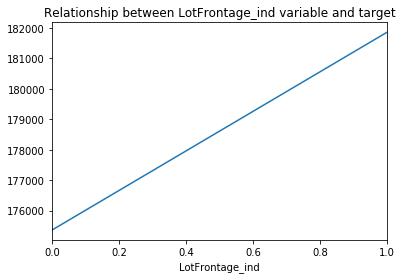

1


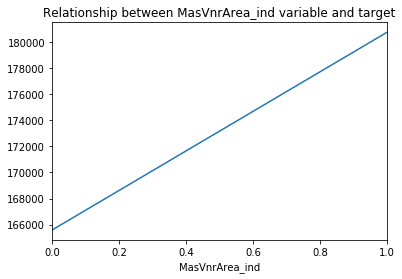

2


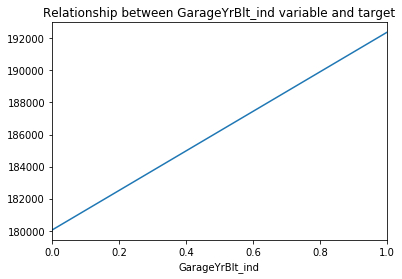

3


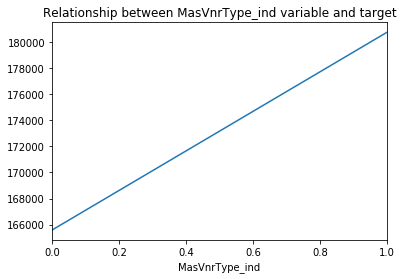

4


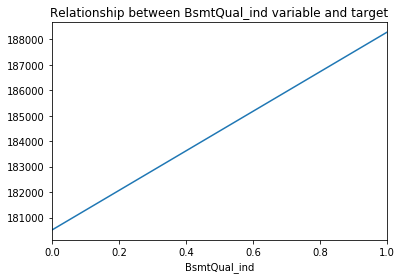

5


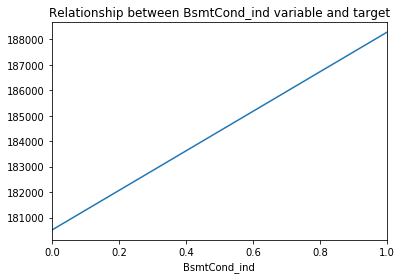

6


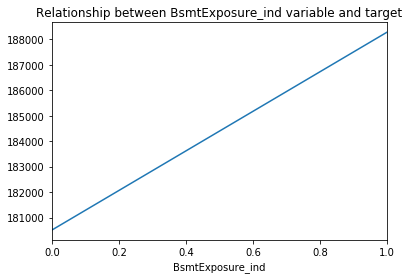

7


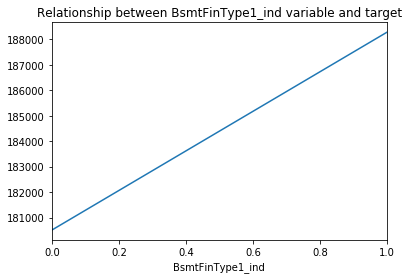

8


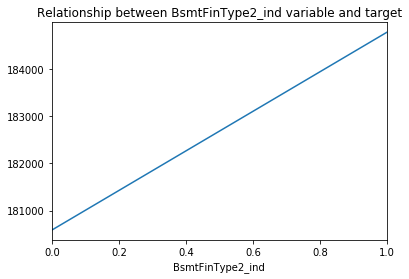

9


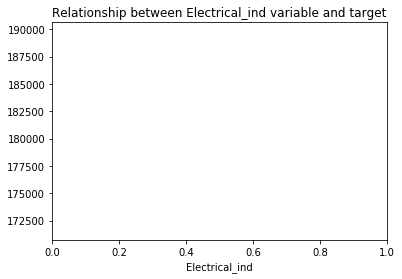

10


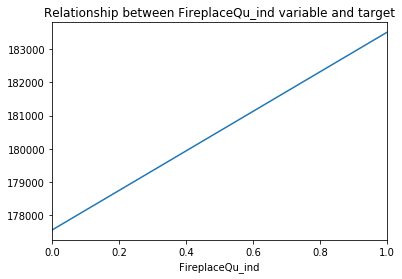

11


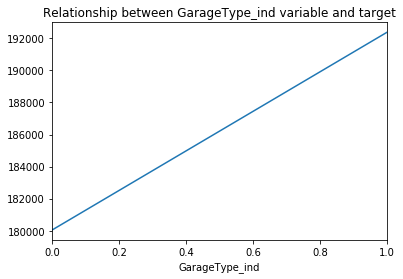

12


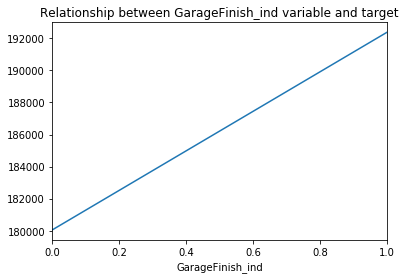

13


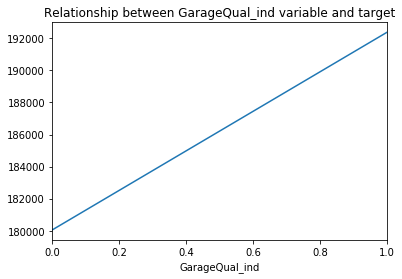

14


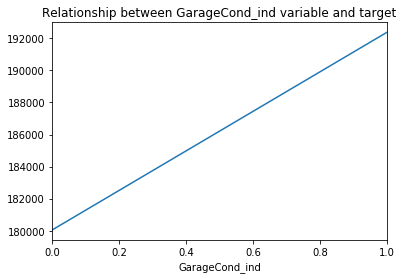

15


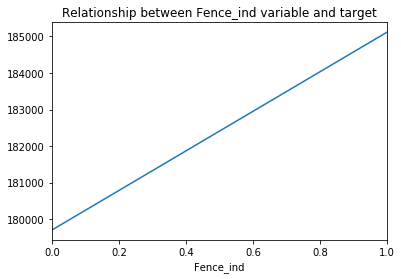

16


In [366]:
# Explore the realtionship between categorical variabels and the target
i = 0
for var in categorical:
    i = i + 1
    fig = plt.figure()
    fig = pd.concat((X_train, y_train), axis=1).groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} variable and target'.format(var))
    fig.set_ylabel = ('Mean SalePrice')
    plt.show()
    print(i)
    
    

In [367]:
X_train_mv = X_train.copy()
X_test_mv = X_test.copy()

## Transforming time Variables

In [368]:
time_variables = [var for var in df.columns if 'Yr' in var or 'Year' in var]
time_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [369]:
# Transforming the time variables:
def transform_time(df, var):
    if var != 'YrSold':
        df[var] = df['YrSold'] - df[var]
    return df

In [370]:
for var in time_variables:
    X_train = transform_time(X_train, var)
    X_test = transform_time(X_test, var)

In [371]:
X_train[time_variables]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,0.0,0.0,0.0,2007
1,47.0,47.0,47.0,2009
2,88.0,3.0,88.0,2009
3,6.0,6.0,6.0,2008
4,5.0,4.0,5.0,2006
...,...,...,...,...
1163,10.0,10.0,10.0,2009
1164,60.0,15.0,14.0,2010
1165,32.0,32.0,32.0,2010
1166,3.0,2.0,3.0,2006


In [372]:
X_train_time = X_train.copy()
X_test_time = X_test.copy()

## Dealing with outliers

In [373]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [374]:
#My function
for var in X_train[continuous]:
    # define figure size
    print('For feature: ' + str(var))
    print('total: {}'.format(len(X_train)))  
    
    upper_boundary, lower_boundary = find_skewed_boundaries(X_train, var, 1.5)
    print('over the upper bound: {}'.format(
        round(len(X_train[X_train[var] > upper_boundary])/len(X_train), 2)))
    print('under the lower bound: {}'.format(
        round(len(X_train[X_train[var] < lower_boundary])/len(X_train), 2)))
    print()
    
    X_train[var]= np.where(X_train[var] > upper_boundary, upper_boundary,
                        np.where(X_train[var] < lower_boundary, lower_boundary, X_train[var]))
   
    X_test[var]= np.where(X_test[var] > upper_boundary, upper_boundary,
                        np.where(X_test[var] < lower_boundary, lower_boundary, X_test[var]))   
    

For feature: Id
total: 1168
over the upper bound: 0.0
under the lower bound: 0.0

For feature: LotFrontage
total: 1168
over the upper bound: 0.03
under the lower bound: 0.03

For feature: LotArea
total: 1168
over the upper bound: 0.04
under the lower bound: 0.0

For feature: YearBuilt
total: 1168
over the upper bound: 0.01
under the lower bound: 0.0

For feature: YearRemodAdd
total: 1168
over the upper bound: 0.0
under the lower bound: 0.0

For feature: MasVnrArea
total: 1168
over the upper bound: 0.07
under the lower bound: 0.0

For feature: BsmtFinSF1
total: 1168
over the upper bound: 0.0
under the lower bound: 0.0

For feature: BsmtFinSF2
total: 1168
over the upper bound: 0.12
under the lower bound: 0.0

For feature: BsmtUnfSF
total: 1168
over the upper bound: 0.02
under the lower bound: 0.0

For feature: TotalBsmtSF
total: 1168
over the upper bound: 0.02
under the lower bound: 0.02

For feature: 1stFlrSF
total: 1168
over the upper bound: 0.01
under the lower bound: 0.0

For feature

In [375]:
X_train_outliers = X_train.copy()
X_test_outliers = X_test.copy()

In [240]:
X_train_outliers.LotFrontage.describe()

count    1168.000000
mean       68.982021
std        17.008116
min        31.500000
25%        60.000000
50%        69.000000
75%        79.000000
max       107.500000
Name: LotFrontage, dtype: float64

In [241]:
X_test_outliers.LotFrontage.describe()

count    292.000000
mean      69.523973
std       18.123273
min       31.500000
25%       60.000000
50%       69.000000
75%       78.000000
max      107.500000
Name: LotFrontage, dtype: float64

## Trying with discretizer

In [242]:
X_train_discret = X_train_time.copy()

In [243]:
X_test_discret = X_test_time.copy()

In [244]:
from sklearn.preprocessing import KBinsDiscretizer

In [245]:
continuous_no_ID = [var for var in df[continuous] if var != 'Id']
continuous_no_ID

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [246]:
disc = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')

disc.fit(X_train_discret[continuous_no_ID])

KBinsDiscretizer(encode='ordinal', n_bins=15, strategy='uniform')

In [247]:
X_train_discret[continuous_no_ID] = disc.transform(X_train_discret[continuous_no_ID])
X_test_discret[continuous_no_ID] = disc.transform(X_test_discret[continuous_no_ID])

In [248]:
for var in continuous_no_ID:
    print(X_train_discret[var].value_counts())
    print()
    

2.0     636
3.0     212
1.0     171
0.0      76
4.0      52
5.0      11
6.0       6
7.0       2
14.0      1
8.0       1
Name: LotFrontage, dtype: int64

0.0     1078
1.0       72
2.0        8
3.0        5
11.0       2
7.0        1
4.0        1
14.0       1
Name: LotArea, dtype: int64

0.0     329
4.0     145
5.0     132
3.0     118
1.0     110
9.0      74
6.0      70
8.0      46
7.0      44
2.0      39
10.0     33
11.0     11
12.0      8
14.0      5
13.0      4
Name: YearBuilt, dtype: int64

0.0     253
14.0    155
1.0     142
2.0     122
3.0      81
9.0      64
7.0      56
4.0      45
11.0     45
10.0     44
8.0      42
12.0     40
13.0     30
5.0      26
6.0      23
Name: YearRemodAdd, dtype: int64

0.0     808
1.0     129
2.0     106
3.0      55
4.0      28
5.0      16
6.0      10
7.0       6
8.0       3
10.0      3
9.0       2
14.0      1
12.0      1
Name: MasVnrArea, dtype: int64

0.0     434
4.0     139
3.0     121
2.0     121
1.0      88
5.0      76
6.0      62
7.0      50
8.0  

In [249]:
X_test_discret

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotFrontage_ind,MasVnrArea_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MasVnrType_ind,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,Electrical_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,530.0,2.0,2.0,5.0,8.0,0.0,8.0,0.0,5.0,9.0,11.0,0.0,0.0,7.0,4.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,20,6,3,1,0,3,0,4,2,9,2,2,0,3,2007,2,1,0,1,0,3,1,5,1,0,2,1,1,0,5,1,0,2,0,0,2,1,1,1,0,0,2,1,1,2,1,1,1,0,0,0,0,1,1,3,True,False,False,False,False,False,False,False,False,False,False,False,True
1,492.0,2.0,0.0,7.0,14.0,0.0,2.0,2.0,1.0,3.0,3.0,4.0,0.0,4.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,6,7,1,0,1,0,3,1,5,2,1,0,8,2006,2,1,1,1,0,1,1,6,2,0,2,3,2,0,5,5,4,1,0,1,2,1,1,3,2,0,2,1,0,3,0,1,1,2,0,0,0,0,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,460.0,2.0,0.0,6.0,14.0,1.0,1.0,0.0,3.0,3.0,3.0,1.0,0.0,3.0,8.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,50,5,4,1,0,1,0,3,1,5,1,1,0,7,2009,2,1,0,0,0,2,1,5,1,0,2,3,2,0,0,0,3,1,0,1,2,1,1,2,0,0,2,1,1,1,0,1,2,2,0,0,0,1,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True
3,280.0,3.0,0.0,3.0,7.0,2.0,2.0,0.0,5.0,5.0,4.0,6.0,0.0,5.0,4.0,5.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,7,5,0,0,2,1,4,1,8,1,2,0,3,2008,2,1,1,1,0,1,1,5,1,0,2,0,1,0,3,4,2,1,0,1,1,1,1,3,0,0,1,1,1,2,0,1,1,1,0,0,0,1,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True
4,656.0,0.0,0.0,4.0,9.0,3.0,0.0,0.0,3.0,2.0,0.0,4.0,0.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160,6,5,0,0,1,1,3,1,6,0,1,0,3,2010,0,1,1,1,0,1,1,5,1,0,1,0,2,0,1,1,2,1,0,1,2,1,1,5,0,0,2,1,1,2,0,0,2,2,0,0,0,1,1,3,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,327.0,0.0,0.0,1.0,3.0,0.0,10.0,0.0,0.0,8.0,7.0,0.0,0.0,4.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120,8,5,2,0,1,1,1,1,6,2,2,0,5,2008,2,1,0,1,0,3,1,5,1,0,0,1,2,0,2,1,4,2,0,0,1,1,0,0,0,0,1,1,1,1,0,3,1,1,0,0,0,1,2,1,False,False,False,False,False,False,False,False,False,False,False,False,True
288,441.0,4.0,0.0,0.0,0.0,1.0,11.0,7.0,5.0,14.0,10.0,0.0,0.0,7.0,0.0,7.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,20,10,5,1,0,2,0,2,1,10,2,3,0,4,2009,2,1,1,1,0,1,1,0,1,0,2,1,1,0,4,3,1,0,0,0,0,1,0,0,2,0,1,1,1,0,0,3,1,1,0,0,0,1,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True
289,1388.0,2.0,0.0,10.0,14.0,0.0,1.0,7.0,0.0,3.0,6.0,6.0,0.0,7.0,12.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50,6,7,0,0,2,0,5,1,10,1,1,0,8,2007,0,1,1,1,0,1,1,4,2,0,2,3,2,0,2,1,4,1,1,2,2,1,1,1,2,1,2,0,1,1,0,3,2,2,0,0,0,2,2,3,False,False,False,False,False,False,False,False,False,False,False,False,False
290,1324.0,1.0,0.0,7.0,14.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30,4,7,0,0,1,0,2,1,5,0,0,0,12,2009,2,1,1,0,0,1,1,5,1,0,2,1,1,0,4,3,4,0,

# Feature Selection

In [376]:
X_train.shape, X_test.shape

((1168, 93), (292, 93))

## Quasi-Constant Features

In [377]:
# Import
from sklearn.feature_selection import VarianceThreshold

In [378]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [379]:
# Which are the constant features
sum(sel.get_support())
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MasVnrArea_ind',
 'Street',
 'Utilities',
 'Condition2',
 'MasVnrType_ind',
 'Electrical_ind']

In [380]:
features_to_keep = X_train.columns[sel.get_support()]
features_to_keep

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'LotFrontage_ind', 'GarageYrBlt_ind', 'MSSubClass',
       'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'G

In [381]:
#Transforming the datasets by the constant features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [382]:
X_train= pd.DataFrame(X_train, columns=features_to_keep)
X_test= pd.DataFrame(X_test, columns=features_to_keep)

In [383]:
X_train.shape, X_test.shape

((1168, 81), (292, 81))

In [384]:
X_train.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,619.0,90.0,11694.0,0.0,0.0,415.625,48.0,1686.125,1822.0,1828.0,0.0,1828.0,0.0,774.0,0.0,108.0,1.0,0.0,20.0,9.0,5.0,0.0,0.0,2.0,0.0,3.0,1.0,9.0,1.0,3.0,0.0,7.0,2007.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,871.0,60.0,6600.0,47.0,47.0,0.000,0.0,894.000,894.0,894.0,0.0,894.0,47.0,308.0,0.0,0.0,1.0,0.0,20.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,0.0,8.0,2009.0,2.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,2.0,1.0,1.0,5.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93.0,80.0,13360.0,88.0,3.0,0.000,713.0,163.000,876.0,964.0,0.0,964.0,88.0,432.0,0.0,0.0,1.0,0.0,30.0,5.0,7.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,8.0,2009.0,2.0,0.0,0.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,0.0,5.0,5.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,818.0,69.0,13265.0,6.0,6.0,148.000,1218.0,350.000,1568.0,1689.0,0.0,1689.0,6.0,857.0,150.0,59.0,0.0,0.0,20.0,8.0,5.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,3.0,0.0,7.0,2008.0,2.0,0.0,1.0,3.0,1.0,5.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,303.0,107.5,13704.0,5.0,4.0,150.000,0.0,1541.000,1541.0,1541.0,0.0,1541.0,5.0,843.0,420.0,81.0,1.0,0.0,20.0,7.0,5.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,3.0,0.0,1.0,2006.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Duplicat Features

In [385]:
# Check for dupplicate rows after transposing the columns
X_train_t = X_train.T
X_train_t.duplicated().sum()

7

In [386]:
features_to_drop = X_train_t[X_train_t.duplicated()].index
features_to_drop

Index(['BsmtCond_ind', 'BsmtExposure_ind', 'BsmtFinType1_ind',
       'GarageType_ind', 'GarageFinish_ind', 'GarageQual_ind',
       'GarageCond_ind'],
      dtype='object')

In [387]:
#removing dupplicated features
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

In [388]:
X_train.shape

(1168, 74)

In [389]:
X_train_ND = X_train.copy()
X_test_ND = X_test.copy()

In [390]:
X_train.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtQual_ind,BsmtFinType2_ind,FireplaceQu_ind,Fence_ind
0,619.0,90.0,11694.0,0.0,0.0,415.625,48.0,1686.125,1822.0,1828.0,0.0,1828.0,0.0,774.0,0.0,108.0,1.0,0.0,20.0,9.0,5.0,0.0,0.0,2.0,0.0,3.0,1.0,9.0,1.0,3.0,0.0,7.0,2007.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,871.0,60.0,6600.0,47.0,47.0,0.000,0.0,894.000,894.0,894.0,0.0,894.0,47.0,308.0,0.0,0.0,1.0,0.0,20.0,5.0,5.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,0.0,8.0,2009.0,2.0,1.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,2.0,1.0,1.0,5.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,93.0,80.0,13360.0,88.0,3.0,0.000,713.0,163.000,876.0,964.0,0.0,964.0,88.0,432.0,0.0,0.0,1.0,0.0,30.0,5.0,7.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,8.0,2009.0,2.0,0.0,0.0,1.0,1.0,5.0,1.0,2.0,1.0,2.0,0.0,5.0,5.0,4.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,818.0,69.0,13265.0,6.0,6.0,148.000,1218.0,350.000,1568.0,1689.0,0.0,1689.0,6.0,857.0,150.0,59.0,0.0,0.0,20.0,8.0,5.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,3.0,0.0,7.0,2008.0,2.0,0.0,1.0,3.0,1.0,5.0,1.0,2.0,1.0,1.0,0.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,303.0,107.5,13704.0,5.0,4.0,150.000,0.0,1541.000,1541.0,1541.0,0.0,1541.0,5.0,843.0,420.0,81.0,1.0,0.0,20.0,7.0,5.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,3.0,0.0,1.0,2006.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,4.0,3.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


## Correlated Features

In [401]:
# Checking for correlated features
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack().sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.9] 
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,BsmtQual_ind,BsmtFinType2_ind,0.982176
1,BsmtFinType2_ind,BsmtQual_ind,0.982176
2,GarageCond,GarageQual,0.919115
3,GarageQual,GarageCond,0.919115
4,GarageCond,GarageYrBlt_ind,0.907939
5,GarageYrBlt_ind,GarageCond,0.907939
6,Fireplaces,FireplaceQu_ind,0.903048
7,FireplaceQu_ind,Fireplaces,0.903048


In [403]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  5
{'GarageQual', 'GarageCars', 'BsmtFinType2_ind', 'GarageCond', 'FireplaceQu_ind'}


In [404]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((1168, 69), (292, 69))

In [405]:
X_train_NCor = X_train.copy()
X_test_NCor = X_test.copy()

## Statistical Measures

In [413]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile


mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual        0.561153
GrLivArea          0.489079
TotalBsmtSF        0.396810
GarageArea         0.395963
Neighborhood       0.337954
YearBuilt          0.334000
1stFlrSF           0.332208
KitchenQual        0.323703
ExterQual          0.319664
BsmtQual           0.312652
GarageYrBlt        0.282595
FullBath           0.270367
MSSubClass         0.261882
GarageFinish       0.257530
YearRemodAdd       0.256219
2ndFlrSF           0.217997
LotFrontage        0.216114
Foundation         0.211772
GarageType         0.201708
TotRmsAbvGrd       0.195983
FireplaceQu        0.195042
LotArea            0.179613
Fireplaces         0.171592
BsmtFinType1       0.170482
BsmtFinSF1         0.168147
Exterior2nd        0.165054
HeatingQC          0.162814
Exterior1st        0.159434
OpenPorchSF        0.144981
BsmtUnfSF          0.128714
OverallCond        0.100459
MasVnrType         0.097548
MasVnrArea         0.096725
WoodDeckSF         0.088085
HalfBath           0.085242
MSZoning           0

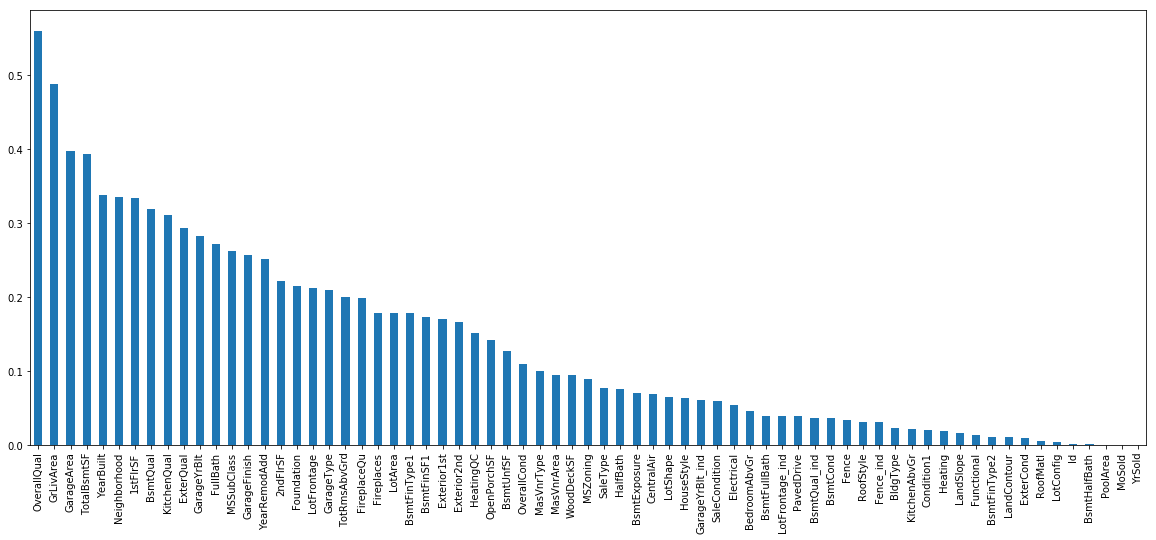

In [412]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [414]:
# Selecting some part of the set
sel_ = SelectPercentile(mutual_info_regression, percentile=90).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'LotFrontage_ind', 'GarageYrBlt_ind', 'MSSubClass', 'OverallQual',
       'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'MSZoning', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition', 'BsmtQual_ind', 'Fence_ind'],
      dtype='object')

In [423]:
X_train_IG = X_train[X_train.columns[sel_.get_support()]]
X_test_IG = X_test[X_train.columns[sel_.get_support()]]

In [424]:
X_train_IG.shape, X_test_IG.shape

((1168, 62), (292, 62))

## Embaded Filtering based on Random Forest

### Random Forest

In [450]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=50), threshold="0.2*mean")
sel_.fit(X_train_IG, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=50, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False,
   

In [451]:
selected_feat = X_train_IG.columns[(sel_.get_support())]
len(selected_feat)

26

In [452]:
X_train_IGa_RF = X_train_IG[selected_feat]
X_test_IGa_RF = X_test_IG[selected_feat]
X_train_IGa_RF.shape, X_test_IGa_RF.shape

((1168, 26), (292, 26))

### Gradient Boosting

In [455]:
from sklearn.ensemble import GradientBoostingRegressor

In [476]:
sel_ = SelectFromModel(GradientBoostingRegressor(), threshold="0.02*mean")
sel_.fit(X_train_IG, y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9,
                                                    criterion='friedman_mse',
                                                    init=None,
                                                    learning_rate=0.1,
                                                    loss='ls', max_depth=3,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    

In [477]:
selected_feat = X_train_IG.columns[(sel_.get_support())]
len(selected_feat)

38

In [478]:
X_train_IGa_GB = X_train_IG[selected_feat]
X_test_IGa_GB = X_test_IG[selected_feat]
X_train_IGa_GB.shape, X_test_IGa_GB.shape

((1168, 38), (292, 38))

### Hybrid_Recursive_feature_elimination

In [483]:
# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgboost.XGBRegressor(n_jobs=-1)

model_all_features.fit(X_train_IG, y_train)

# calculate the R2 in the test set
y_pred_test = model_all_features.predict(X_test_IG)
r2_score_all = r2_score(y_test, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:11:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test all features xgb R2 = 0.872620


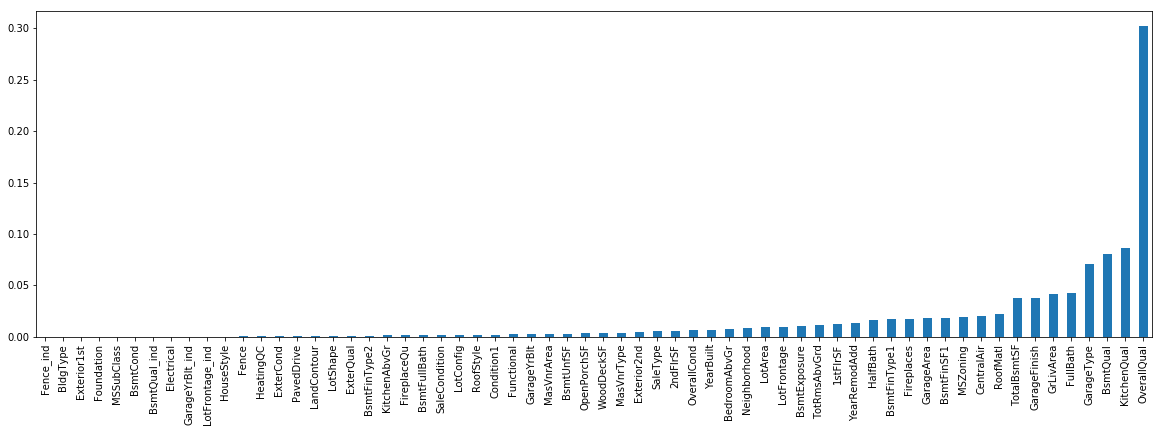

In [484]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train_IG.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [485]:
# view the list of ordered features
features = list(features.index)
features

['Fence_ind',
 'BldgType',
 'Exterior1st',
 'Foundation',
 'MSSubClass',
 'BsmtCond',
 'BsmtQual_ind',
 'Electrical',
 'GarageYrBlt_ind',
 'LotFrontage_ind',
 'HouseStyle',
 'Fence',
 'HeatingQC',
 'ExterCond',
 'PavedDrive',
 'LandContour',
 'LotShape',
 'ExterQual',
 'BsmtFinType2',
 'KitchenAbvGr',
 'FireplaceQu',
 'BsmtFullBath',
 'SaleCondition',
 'LotConfig',
 'RoofStyle',
 'Condition1',
 'Functional',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtUnfSF',
 'OpenPorchSF',
 'WoodDeckSF',
 'MasVnrType',
 'Exterior2nd',
 'SaleType',
 '2ndFlrSF',
 'OverallCond',
 'YearBuilt',
 'BedroomAbvGr',
 'Neighborhood',
 'LotArea',
 'LotFrontage',
 'BsmtExposure',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'YearRemodAdd',
 'HalfBath',
 'BsmtFinType1',
 'Fireplaces',
 'GarageArea',
 'BsmtFinSF1',
 'MSZoning',
 'CentralAir',
 'RoofMatl',
 'TotalBsmtSF',
 'GarageFinish',
 'GrLivArea',
 'FullBath',
 'GarageType',
 'BsmtQual',
 'KitchenQual',
 'OverallQual']

In [486]:
# recursive feature elimination:

# first we arbitrarily set the drop in r2
# if the drop is below this threshold,
# the feature will be removed
tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgboost.XGBRegressor(n_jobs=-10)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train_IG.drop(features_to_remove + [feature], axis=1), y_train)

    # make a prediction over the test set
    y_pred_test = model_int.predict(
        X_test_IG.drop(features_to_remove + [feature], axis=1))

    # calculate the new r2
    r2_score_int = r2_score(y_test, y_pred_test)
    print('New Test r2 = {}'.format((r2_score_int)))

    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_score_all)))

    # determine the drop in the r2
    diff_r2 = r2_score_all - r2_score_int

    # compare the drop in r2 with the tolerance
    # we set previously
    if diff_r2 >= tol:
        print('Drop in r2 ={}'.format(diff_r2))
        print('keep: ', feature)
        print
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in the r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_score_all = r2_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  Fence_ind  which is feature  1  out of  62
[18:21:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  Fence_ind

testing feature:  

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


BldgType  which is feature  2  out of  62
[18:21:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  BldgType

testing feature:  Exterior1st  which is feature  3  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.872620380966038

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  Exterior1st

testing feature:  Foundation  which is feature  4  out of  62
[18:21:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  Foundation

testing feature:  MSSubClass  which is feature  5  out of  62
[18:21:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.872620380966038

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  MSSubClass

testing feature:  BsmtCond  which is feature  6  out of  62
[18:21:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  BsmtCond

testing feature:  BsmtQual_ind  which is feature  7  out of  62
[18:21:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  BsmtQual_ind

testing feature:  Electrical  which is feature  8  out of  62
[18:21:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  Electrical

testing feature:  GarageYrBlt_ind  which is feature  9  out of  62
[18:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.872620380966038
All features Test r2 = 0.872620380966038
Drop in r2 = 0.0
remove:  GarageYrBlt_ind

testing feature:  LotFrontage_ind  which is feature  10  out of  62
[18:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8726074132795403

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.872620380966038
Drop in r2 = 1.2967686497722397e-05
remove:  LotFrontage_ind

testing feature:  HouseStyle  which is feature  11  out of  62
[18:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8723714749751501

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8726074132795403
Drop in r2 = 0.00023593830439017083
remove:  HouseStyle

testing feature:  Fence  which is feature  12  out of  62
[18:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8732778562613468
All features Test r2 = 0.8723714749751501
Drop in r2 = -0.0009063812861966891
remove:  Fence

testing feature:  HeatingQC  which is feature  13  out of  62
[18:21:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.87218597524005
All features Test r2 = 0.8732778562613468
Drop in r2 =0.001091881021296759
keep:  HeatingQC

testing feature:  ExterCond  which is feature  14  out of  62
[18:21:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8747292700350446

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8732778562613468
Drop in r2 = -0.0014514137736978405
remove:  ExterCond

testing feature:  PavedDrive  which is feature  15  out of  62
[18:21:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8718619056934825
All features Test r2 = 0.8747292700350446
Drop in r2 =0.0028673643415620953
keep:  PavedDrive

testing feature:  LandContour  which is feature  

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


16  out of  62
[18:21:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8737499437841365
All features Test r2 = 0.8747292700350446
Drop in r2 = 0.0009793262509081302
remove:  LandContour

testing feature:  LotShape  which is feature  17  out of  62
[18:21:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.873840615027872
All features Test r2 = 0.8737499437841365
Drop in r2 = -9.067124373551838e-05
remove:  LotShape

testing feature:  ExterQual  which is feature  18  out of  62
[18:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8714848574942238
All features Test r2 = 0.873840615027872
Drop in r2 =0.0023557575336482506
keep:  ExterQual

testing feature:  BsmtFinType2  which is feature  19  out of  62
[18:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8739964758267752
All features Test r2 = 0.873840615027872
Drop in r2 = -0.0001558607989031735
remove:  BsmtFinType2

testing feature:  KitchenAbvGr  which is feature  20  out of  62
[18:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.872658238658912
All features Test r2 = 0.8739964758267752
Drop in r2 =0.0013382371678631877
keep:  KitchenAbvGr

testing feature:  FireplaceQu  which is feature  21  out of  62
[18:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8739964758267752
All features Test r2 = 0.8739964758267752
Drop in r2 = 0.0
remove:  FireplaceQu

testing feature:  BsmtFullBath  which is feature  22  out of  62
[18:21:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8739874353086372
All features Test r2 = 0.8739964758267752
Drop in r2 = 9.04051813799267e-06
remove:  BsmtFullBath

testing feature:  SaleCondition  which is feature  23  out of  62
[18:21:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8765183798306764
All features Test r2 = 0.8739874353086372
Drop in r2 = -0.002530944522039169
remove:  SaleCondition

testing feature:  LotConfig  which is feature  24  out of  62
[18:21:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.875471921109808
All features Test r2 = 0.8765183798306764
Drop in r2 =0.0010464587208683929
keep:  LotConfig

testing feature:  RoofStyle  which is feature  25  out of  62
[18:21:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8749564480379048
All features Test r2 = 0.8765183798306764
Drop in r2 =0.0015619317927715315
keep:  RoofStyle

testing feature:  Condition1  which is feature  26  out of  62
[18:21:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8729773815193024
All features Test r2 = 0.8765183798306764
Drop in r2 =0.0035409983113739996
keep:  Condition1

testing feature:  Functional  which is feature  27  out of  62
[18:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8748365144518471
All features Test r2 = 0.8765183798306764
Drop in r2 =0.0016818653788293059
keep:  Functional

testing feature:  GarageYrBlt  which is feature  28  out of  62
[18:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8768204480034033
All features Test r2 = 0.8765183798306764
Drop in r2 = -0.00030206817272693254
remove:  GarageYrBlt

testing feature:  MasVnrArea  which is feature  29  out of  62
[18:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8799426068247682
All features Test r2 = 0.8768204480034033
Drop in r2 = -0.0031221588213649065
remove:  MasVnrArea

testing feature:  BsmtUnfSF  which is feature  30  out of  62
[18:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8703749572863733
All features Test r2 = 0.8799426068247682
Drop in r2 =0.009567649538394951
keep:  BsmtUnfSF

testing feature:  OpenPorchSF  which is feature  

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


31  out of  62
[18:21:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8721707269005089
All features Test r2 = 0.8799426068247682
Drop in r2 =0.007771879924259317
keep:  OpenPorchSF

testing feature:  WoodDeckSF  which is feature  

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


32  out of  62
[18:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8759001982910003
All features Test r2 = 0.8799426068247682
Drop in r2 =0.004042408533767916
keep:  WoodDeckSF

testing feature:  MasVnrType  which is feature  33  out of  62
[18:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8737837328034807
All features Test r2 = 0.8799426068247682
Drop in r2 =0.006158874021287564
keep:  MasVnrType

testing feature:  Exterior2nd  which is feature  34  out of  62
[18:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8802575779946997
All features Test r2 = 0.8799426068247682
Drop in r2 = -0.00031497116993151053
remove:  Exterior2nd

testing feature:  SaleType  which is feature  35  out of  62
[18:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8721016873602263
All features Test r2 = 0.8802575779946997
Drop in r2 =0.008155890634473417
keep:  SaleType

testing feature:  2ndFlrSF  which is feature  36  out of  62
[18:21:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8526425507169599
All features Test r2 = 0.8802575779946997
Drop in r2 =0.02761502727773979
keep:  2ndFlrSF

testing feature:  OverallCond  which is feature  37  out of  62
[18:21:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8715290357938301
All features Test r2 = 0.8802575779946997
Drop in r2 =0.008728542200869605
keep:  OverallCond

testing feature:  YearBuilt  which is feature  38  out of  62
[18:21:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8791027130585269
All features Test r2 = 0.8802575779946997
Drop in r2 =0.0011548649361727836
keep:  YearBuilt

testing feature:  BedroomAbvGr  which is feature  39  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8813829111622281
All features Test r2 = 0.8802575779946997
Drop in r2 = -0.0011253331675283862
remove:  BedroomAbvGr

testing feature:  Neighborhood  which is feature  40  out of  62
[18:21:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8378272569446927
All features Test r2 = 0.8813829111622281
Drop in r2 =0.04355565421753538
keep:  Neighborhood

testing feature:  LotArea  which is feature  41  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8608038667996346
All features Test r2 = 0.8813829111622281
Drop in r2 =0.0205790443625935
keep:  LotArea

testing feature:  LotFrontage  which is feature  42  out of  62
[18:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.887754173157489
All features Test r2 = 0.8813829111622281


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Drop in r2 = -0.006371261995260835
remove:  LotFrontage

testing feature:  BsmtExposure  which is feature  43  out of  62
[18:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8793998211501213
All features Test r2 = 0.887754173157489
Drop in r2 =0.008354352007367671
keep:  BsmtExposure

testing feature:  TotRmsAbvGrd  which is feature  44  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8887315406211385
All features Test r2 = 0.887754173157489
Drop in r2 = -0.0009773674636495144
remove:  TotRmsAbvGrd

testing feature:  1stFlrSF  which is feature  45  out of  62
[18:21:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8791180424693312
All features Test r2 = 0.8887315406211385
Drop in r2 =0.009613498151807232
keep:  1stFlrSF

testing feature:  YearRemodAdd  which is feature  46  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9003885863953347
All features Test r2 = 0.8887315406211385
Drop in r2 = -0.01165704577419624
remove:  YearRemodAdd

testing feature:  HalfBath  which is feature  47  out of  62
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8957682008437737

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.9003885863953347
Drop in r2 =0.004620385551560968
keep:  HalfBath

testing feature:  BsmtFinType1  which is feature  48  out of  62
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8969840842008715
All features Test r2 = 0.9003885863953347
Drop in r2 =0.0034045021944631992
keep: 

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


 BsmtFinType1

testing feature:  Fireplaces  which is feature  49  out of  62
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9030390812013637
All features Test r2 = 0.9003885863953347
Drop in r2 = -0.002650494806028969
remove:  Fireplaces

testing feature:  GarageArea  which is feature  50  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8998538473639666
All features Test r2 = 0.9030390812013637
Drop in r2 =0.0031852338373971056
keep:  GarageArea

testing feature:  BsmtFinSF1  which is feature  51  out of  62
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8923827286271393

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.9030390812013637
Drop in r2 =0.01065635257422437
keep:  BsmtFinSF1

testing feature:  MSZoning  which is feature  52  out of  62
[18:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8966713192911296
All features Test r2 = 0.9030390812013637
Drop in r2 =0.006367761910234027
keep:  MSZoning

testing feature:  CentralAir  which is feature  53  out of  62
[18:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8984545464323829
All features Test r2 = 0.9030390812013637
Drop in r2 =0.004584534768980797
keep:  CentralAir

testing feature:  RoofMatl  which is feature  54  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9028377433979433
All features Test r2 = 0.9030390812013637
Drop in r2 = 0.0002013378034203539
remove:  RoofMatl

testing feature:  TotalBsmtSF  which is feature  55  out of  62
[18:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8957712114481228
All features Test r2 = 0.9028377433979433
Drop in r2 =0.0070665319498205426
keep:  TotalBsmtSF

testing feature:  GarageFinish  which is feature  56  out of  62
[18:21:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9042071163607557
All features Test r2 = 0.9028377433979433
Drop in r2 = -0.0013693729628123652
remove:  GarageFinish

testing feature:  GrLivArea  which is feature  57  out of  62
[18:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8872794121561042
All features Test r2 = 0.9042071163607557
Drop in r2 =0.016927704204651506
keep:  GrLivArea

testing feature:  FullBath  which is feature  58  out of  62
[18:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9014846244326549
All features Test r2 = 0.9042071163607557
Drop in r2 =0.002722491928100812
keep:  FullBath

testing feature:  GarageType  which is feature  59  out of  62


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9009747111706385
All features Test r2 = 0.9042071163607557
Drop in r2 =0.003232405190117138
keep:  GarageType

testing feature:  BsmtQual  which is feature  60  out of  62
[18:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9013023653132708
All features Test r2 = 0.9042071163607557
Drop in r2 =0.002904751047484888
keep:  BsmtQual

testing feature:  KitchenQual  which is feature  61  out of  62
[18:21:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8924108166861099
All features Test r2 = 0.9042071163607557
Drop in r2 =0.011796299674645794
keep:  KitchenQual

testing feature:  OverallQual  which is feature  62  out of  62
[18:21:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8879818029005799
All features Test r2 = 0.9042071163607557
Drop in r2 =0.01622531346017575
keep:  OverallQual
DONE!!
total features to remove:  29
total features to keep:  33


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [487]:
X_train_XGB = X_train_IG[features_to_keep]
X_test_XGB = X_test_IG[features_to_keep]

In [488]:
X_train_XGB.shape, X_test_XGB.shape

((1168, 33), (292, 33))

# Building a model

## Linear Regression

In [391]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

In [392]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [69]:
# check model performance:
def run_a_model(X_train, X_test, ytrain, ytest):
    from sklearn.preprocessing import StandardScaler 
    # Sacaling:
    scaler = StandardScaler()
    scaler.fit(X_train)
    Xtrain = scaler.transform(X_train)
    Xtest = scaler.transform(X_test)
    
    #Building the model:
    regressor = Lasso(random_state=0)
    regressor.fit(Xtrain, y_train)

    #Making prediction:
    X_train_preds = regressor.predict(Xtrain)
    X_test_preds = regressor.predict(Xtest)
    
    #Printing the results:
    print('train mse: {}'.format(mean_squared_error(ytrain, X_train_preds)))
    print('train rmse: {}'.format(sqrt(mean_squared_error(ytrain, X_train_preds))))
    print('train r2: {}'.format(r2_score(ytrain, X_train_preds)))
    print()
    print('test mse: {}'.format(mean_squared_error(ytest, X_test_preds)))
    print('test rmse: {}'.format(sqrt(mean_squared_error(ytest, X_test_preds))))
    print('test r2: {}'.format(r2_score(ytest, X_test_preds)))
    
    #Getting the imporance order:
    importance = pd.Series(np.abs(regressor.coef_))
    importance.index = X_train.columns
    importance.sort_values(inplace=True, ascending=False)
    importance.plot.bar(figsize=(18,6))
    plt.title("Feature Importance")

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178979413167.28522, tolerance: 719132949.9230078
  positive)


train mse: 739279326.748032
train rmse: 27189.691553013836
train r2: 0.8799278695637368

test mse: 2639664025.1256227
test rmse: 51377.66075957159
test r2: 0.6177640639624733


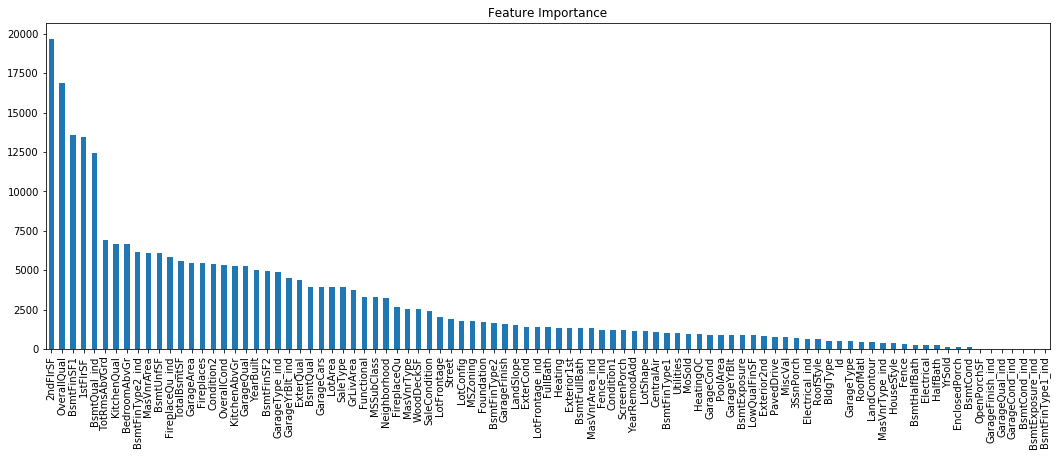

In [70]:
# Check the result after the first round:
run_a_model(X_train_mv, X_test_mv, y_train, y_test)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


train mse: 756308617.1661149
train rmse: 27501.06574600546
train r2: 0.8771620094803614

test mse: 2286373098.901446
test rmse: 47816.03391020052
test r2: 0.6689222744746752


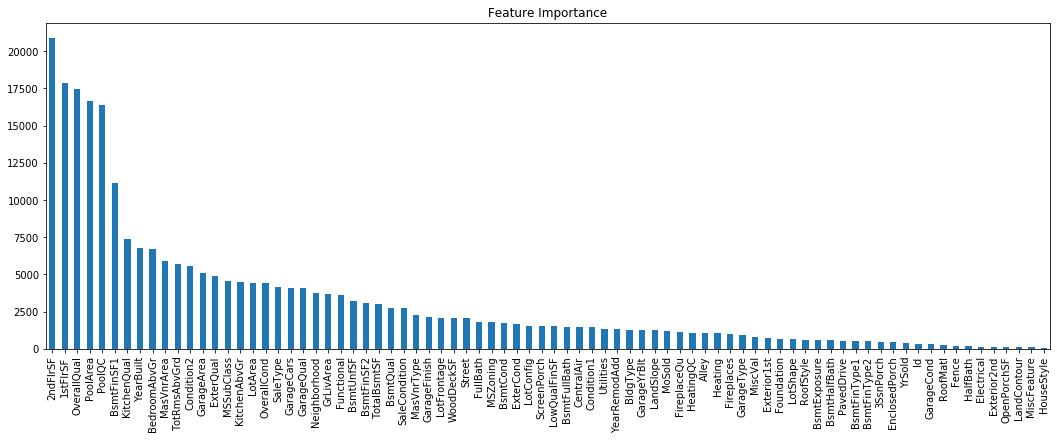

In [35]:
# Test if we transform time variable
run_a_model(X_train_time, X_test_time, y_train, y_test)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178581511207.99548, tolerance: 719132949.9230078
  positive)


train mse: 737736892.3110197
train rmse: 27161.312418788228
train r2: 0.8801783883895844

test mse: 1535573079.9504807
test rmse: 39186.38896288456
test r2: 0.7776416968288354


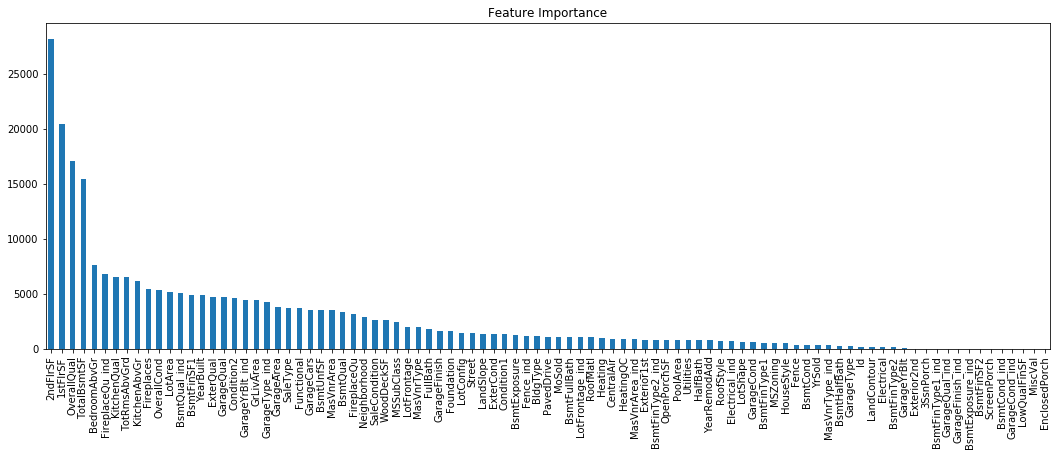

In [72]:
# Test if we deal with outliers and have transformed time variable and have added a missing indicator
run_a_model(X_train_outliers, X_test_outliers, y_train, y_test)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


train mse: 755360445.8506576
train rmse: 27483.821529231656
train r2: 0.8773160093904715

test mse: 1454689688.0951428
test rmse: 38140.39444073885
test r2: 0.7893539975994776


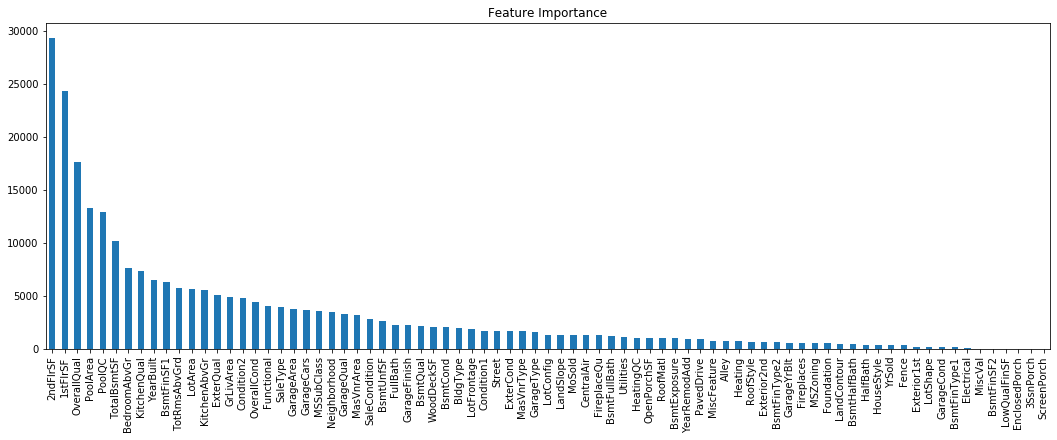

In [38]:
# Test if we deal with outliers and have transformed time variable
run_a_model(X_train_outliers.iloc[:,1:], X_test_outliers.iloc[:,1:], y_train, y_test)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


train mse: 756224716.191939
train rmse: 27499.540290556477
train r2: 0.8771756364929809

test mse: 1680024407.2503912
test rmse: 40988.10080072498
test r2: 0.7567244559312114


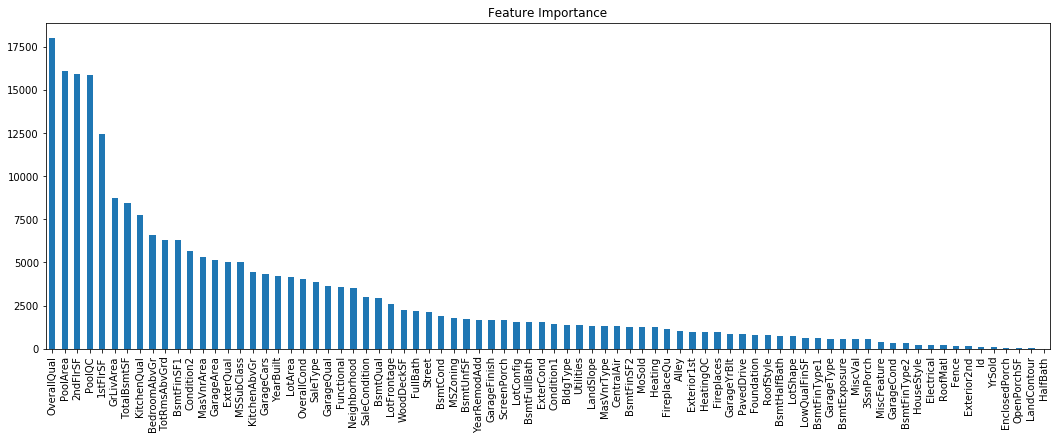

In [72]:
# Test if we deal with discretisation and have transformed time variable
run_a_model(X_train_discret, X_test_discret, y_train, y_test)

## Descision Tree & Random Forest

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [107]:
def run_RandomForest(X_train, X_test, ytrain, ytest):
    regressor_rf = RandomForestRegressor(max_depth=15, min_samples_split=15, random_state=0)
    regressor_rf.fit(X_train, ytrain)
    
    #Making prediction:
    X_train_preds = regressor_rf.predict(X_train)
    X_test_preds = regressor_rf.predict(X_test)
    
        #Printing the results:
    print('train mse: {}'.format(mean_squared_error(ytrain, X_train_preds)))
    print('train rmse: {}'.format(sqrt(mean_squared_error(ytrain, X_train_preds))))
    print('train r2: {}'.format(r2_score(ytrain, X_train_preds)))
    print()
    print('test mse: {}'.format(mean_squared_error(ytest, X_test_preds)))
    print('test rmse: {}'.format(sqrt(mean_squared_error(ytest, X_test_preds))))
    print('test r2: {}'.format(r2_score(ytest, X_test_preds)))

### GridSearch for the best params

In [89]:
# Random Forest
def grid_search_RF(Xtrain, ytrain):
    from sklearn.model_selection import GridSearchCV
    #first we specifiy the parameter to test, than we create an object that takes the parameter as input
    #where one dictionary is one of the models to testm where we include the different parameters to test as lists
    rf_regressor = RandomForestRegressor()
    parameters = [{'n_estimators' : [1, 10, 100, 50], 
                   'max_depth' : [15, 20, 10],
                   'min_samples_split' : [10, 20, 40],
                   'min_samples_leaf' : [2, 5]
                      }]
    gridsearch = GridSearchCV(estimator = rf_regressor,
                              param_grid = parameters,
                              scoring = 'r2',
                              cv = 3,
                              n_jobs=-1
                              )
    
    gridsearch.fit(Xtrain, ytrain)
    
    return gridsearch.best_params_, gridsearch.best_score_, gridsearch.best_estimator_

In [93]:
best_params, best_score, predictor = grid_search_RF(X_train_outliers, y_train)

In [94]:
print('R2 on the Train set with CrossValidation is :  {}'.format(round(best_score,3)))

R2 on the Train set with CrossValidation is :  0.851


In [490]:
def rf_from_grid(X_train, X_test, ytrain, ytest, predictor):
    predictor.fit(X_train, ytrain)
    
    #Making prediction:
    X_train_preds = predictor.predict(X_train)
    X_test_preds = predictor.predict(X_test)
    
        #Printing the results:
    print('train mse: {}'.format(mean_squared_error(ytrain, X_train_preds)))
    print('train rmse: {}'.format(sqrt(mean_squared_error(ytrain, X_train_preds))))
    print('train r2: {}'.format(r2_score(ytrain, X_train_preds)))
    print()
    print('test mse: {}'.format(mean_squared_error(ytest, X_test_preds)))
    print('test rmse: {}'.format(sqrt(mean_squared_error(ytest, X_test_preds))))
    print('test r2: {}'.format(r2_score(ytest, X_test_preds)))
    
    return predictor
    

In [98]:
#Run a random forest with gridsearch:
rf_from_grid(X_train_outliers, X_test_outliers, y_train, y_test, predictor)

train mse: 271931167.6722863
train rmse: 16490.335583980283
train r2: 0.9558335348317394

test mse: 1135881342.7147093
test rmse: 33702.838793115174
test r2: 0.8355189660019491


In [397]:
#Run a random forest with gridsearch with no dupplicated features:
rf_from_grid(X_train_ND, X_test_ND, y_train, y_test, predictor)

train mse: 287053472.5860763
train rmse: 16942.65246607143
train r2: 0.9533774031607879

test mse: 1156752682.516207
test rmse: 34011.06705935889
test r2: 0.8324966964898269


In [406]:
#Run a random forest with gridsearch with no dupplicated features and .85 correlated features:
rf_from_grid(X_train_NCor, X_test_NCor, y_train, y_test, predictor)

train mse: 281611200.81940705
train rmse: 16781.275303724895
train r2: 0.9542613250314448

test mse: 1160762391.5997136
test rmse: 34069.96318753094
test r2: 0.831916071497334


In [426]:
#Run a random forest with gridsearch with no dupplicated features and .85 correlated features and .9 IG:
rf_from_grid(X_train_IG, X_test_IG, y_train, y_test, predictor)

train mse: 279766980.0926927
train rmse: 16726.236279949313
train r2: 0.9545608593260468

test mse: 997008543.590812
test rmse: 31575.442096521972
test r2: 0.855628409422783


In [453]:
#Run a random forest with gridsearch with no dupplicated features and .85 correlated features and .9 IG 
#and RF selection (43 features remaining):
rf_from_grid(X_train_IGa_RF, X_test_IGa_RF, y_train, y_test, predictor)

train mse: 320771081.52613413
train rmse: 17910.083236158735
train r2: 0.9479010629032314

test mse: 1153664700.983603
test rmse: 33965.64000550561
test r2: 0.8329438509384031


## XGBOOST

In [481]:
import xgboost
from xgboost import plot_importance

In [394]:
xgb = xgboost.XGBRegressor(n_jobs=-1)

In [395]:
xgb.fit(X_train_ND, y_train)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [396]:
#Run a random forest with gridsearch:
rf_from_grid(X_train_ND, X_test_ND, y_train, y_test, xgb)

[16:33:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train mse: 213003114.94066322
train rmse: 14594.62623504498
train r2: 0.9654045002002299

test mse: 1068821364.2252105
test rmse: 32692.83353007522
test r2: 0.8452295706109466


In [407]:
#Run a xgb with  with gridsearch with no dupplicated features and .85 correlated features:
rf_from_grid(X_train_NCor, X_test_NCor, y_train, y_test, xgb)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train mse: 206979561.75662917
train rmse: 14386.784274348078
train r2: 0.9663828325266385

test mse: 1095702482.046735
test rmse: 33101.39698028975
test r2: 0.8413370565885394


In [425]:
#Run a xgb with  with gridsearch with no dupplicated features and .85 correlated features and .9 InfoGain selection:
rf_from_grid(X_train_IG, X_test_IG, y_train, y_test, xgb)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:30:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train mse: 211113507.473847
train rmse: 14529.745609398913
train r2: 0.9657114061098364

test mse: 879664537.5204746
test rmse: 29659.139190483504
test r2: 0.872620380966038


In [479]:
#Run a xgb with  with gridsearch with no dupplicated features and .85 correlated features and .9 InfoGain selection
#and Gradient Boosting with 38 features selected:
rf_from_grid(X_train_IGa_GB, X_test_IGa_GB, y_train, y_test, xgb)

[18:03:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train mse: 214544576.9499739
train rmse: 14647.340268798765
train r2: 0.9651541393139617

test mse: 840351863.1341835
test rmse: 28988.823072594438
test r2: 0.8783130436493002


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [491]:
# Final XBGB with Hybrid recursive feature elmination and .85 correlated features
rf_from_grid(X_train_XGB, X_test_XGB, y_train, y_test, xgb)

[18:26:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train mse: 237630675.6174838
train rmse: 15415.274101276429
train r2: 0.9614045456892308

test mse: 747173370.1057854
test rmse: 27334.47219365659
test r2: 0.8918057336894961


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [492]:
xgb = rf_from_grid(X_train_XGB, X_test_XGB, y_train, y_test, xgb)

[18:27:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train mse: 237630675.6174838
train rmse: 15415.274101276429
train r2: 0.9614045456892308

test mse: 747173370.1057854
test rmse: 27334.47219365659
test r2: 0.8918057336894961


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [493]:
xgb.feature_importances_

array([2.4994145e-04, 9.5432450e-04, 2.2521166e-03, 3.5269388e-03,
       2.2159384e-03, 1.7489439e-03, 6.7771510e-03, 2.6581013e-03,
       4.8960126e-03, 5.6654373e-03, 3.2455192e-03, 4.1164677e-03,
       5.6225634e-03, 8.4821647e-03, 6.8716123e-03, 8.3109811e-03,
       1.1601214e-02, 1.0334700e-02, 1.1444302e-02, 1.7254094e-02,
       5.2637318e-03, 2.2339713e-02, 2.9593138e-02, 2.6906855e-02,
       1.8220074e-02, 3.0797075e-02, 4.9936909e-02, 5.0874859e-02,
       7.0669197e-02, 5.4007620e-02, 9.0818033e-02, 6.4744398e-02,
       3.6759996e-01], dtype=float32)

Text(0.5,1,'Feature Importance')

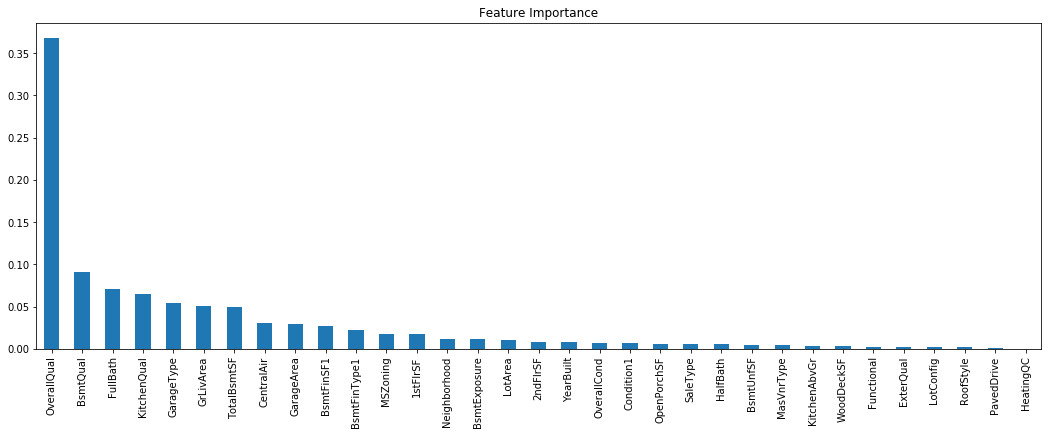

In [495]:
    importance = pd.Series(np.abs(xgb.feature_importances_))
    importance.index = X_train_XGB.columns
    importance.sort_values(inplace=True, ascending=False)
    importance.plot.bar(figsize=(18,6))
    plt.title("Feature Importance")

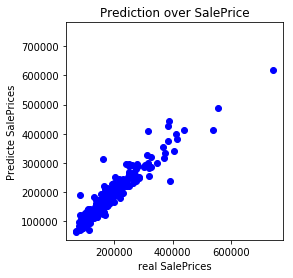

In [497]:
#Visualising the results
plt.scatter(y_test, xgb.predict(X_test_XGB), color='blue')
plt.title('Prediction over SalePrice')
plt.axis('square')
plt.xlabel('real SalePrices')
plt.ylabel('Predicte SalePrices')
plt.show()